<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Chemical-Data" data-toc-modified-id="Import-Chemical-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Chemical Data</a></span></li><li><span><a href="#EGO-utilities" data-toc-modified-id="EGO-utilities-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EGO utilities</a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examples</a></span></li></ul></div>

# EGO decompositions

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import networkx as nx
import toolz as tz
from eden.util import configure_logging
import logging
logger = logging.getLogger()
configure_logging(logger, verbosity=1)
import matplotlib.pyplot as plt
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate graphs

________________________________________________________________________________
Dataset 624249 info:

qHTS screen for small molecules that inhibit ELG1-dependent DNA repair in human embryonic kidney (HEK293T) cells expressing luciferase-tagged ELG1: Hit Confirmation using MMS Stimulated ELG1
Reading from file: PUBCHEM/AID624249_active.sdf
Reading from file: PUBCHEM/AID624249_inactive.sdf

Positive graphs
original size:355
random sample:355
removed disconnected:339
size filter:307
outlier removal:246
random sample:246

Negative graphs
original size:173
random sample:173
removed disconnected:170
size filter:154
outlier removal:130
random sample:130
--------------------------------------------------------------------------------
Selecting a good cluster of molecular graphs in 1 attempts. This might take a while...
0.237   
Generated 89 graphs


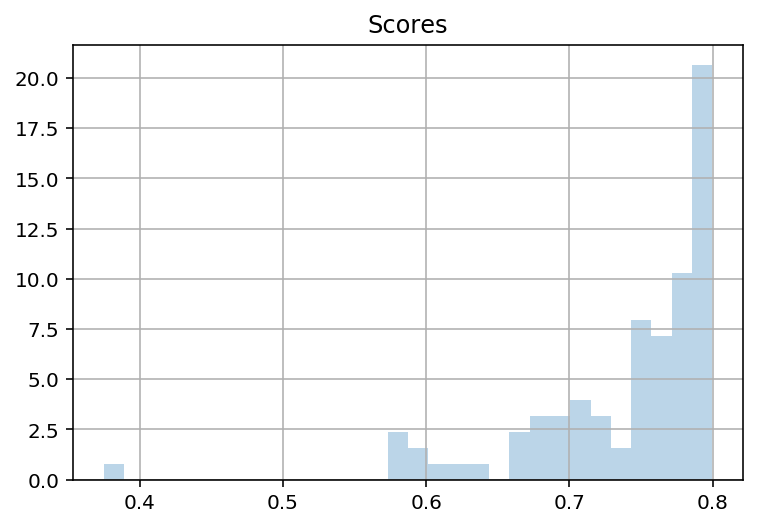

Best graphs in initial sample of 50


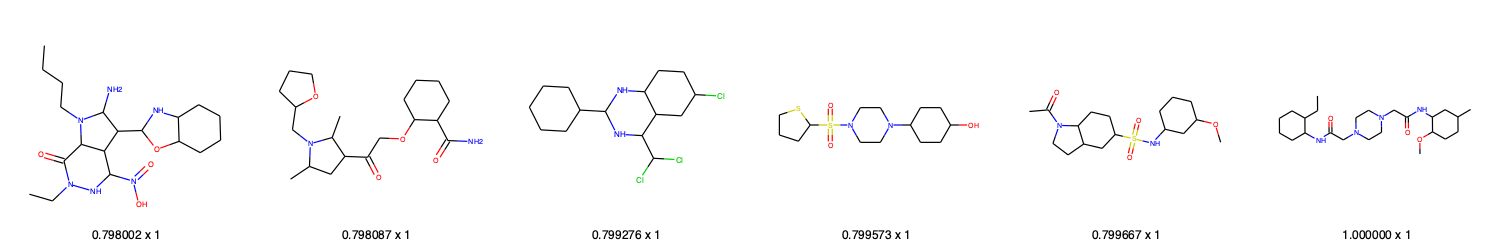

CPU times: user 5min 18s, sys: 3.16 s, total: 5min 22s
Wall time: 5min 24s


In [16]:
%%time

EXPERIMENT_TYPE = 'CHEMICAL'

if EXPERIMENT_TYPE == 'ARTIFICIAL':
    from utils_artificial import build_artificial_experiment
    from utils_artificial import display_ktop_graphs, draw_graphs, draw_history, draw_decomposition_graphs
    from utils_artificial import display_score_statistics
    from utils_artificial import remove_duplicates
    res = build_artificial_experiment(
        GRAPH_TYPE='regular', # path  tree  degree  regular  dense
        instance_size=20,
        n_init_instances=10, 
        n_domain_instances=20,
        alphabet_size=4, 
        max_score_threshold=.8,
        oracle_func=None,
        neighborhood_estimators=['node_add','node_smooth','edge_swap','edge_expand','edge_contract'],
        n_iterations=2, 
        n_neighbors_per_estimator_per_iteration=2)
    
if EXPERIMENT_TYPE == 'CHEMICAL':
    from utils_chemoinformatics import build_chemical_experiment
    from utils_chemoinformatics import display_ktop_graphs, draw_graphs, draw_history, draw_decomposition_graphs
    from utils_chemoinformatics import display_score_statistics
    from utils_chemoinformatics import remove_duplicates
    res = build_chemical_experiment(
        assay_id='624249',  # assay_ids = ['624466','492992','463230','651741','743219','588350','492952','624249','463213','2631','651610']
        n_init_instances=50, 
        n_domain_instances=300,
        max_score_threshold=.8,
        n_targets=1)

init_graphs, domain_graphs, oracle_func, target_graph = res
print('Generated %d graphs'%len(domain_graphs))
display_score_statistics(domain_graphs, oracle_func)

print('Best graphs in initial sample of %d'%len(init_graphs))
display_ktop_graphs(init_graphs+[target_graph], oracle_func, n_max=6)

In [25]:
graphs = [target_graph]+init_graphs[-1:]

## EGO utilities

In [26]:
from ego.setup import *

## Decomposition examples

________________________________________________________________________________


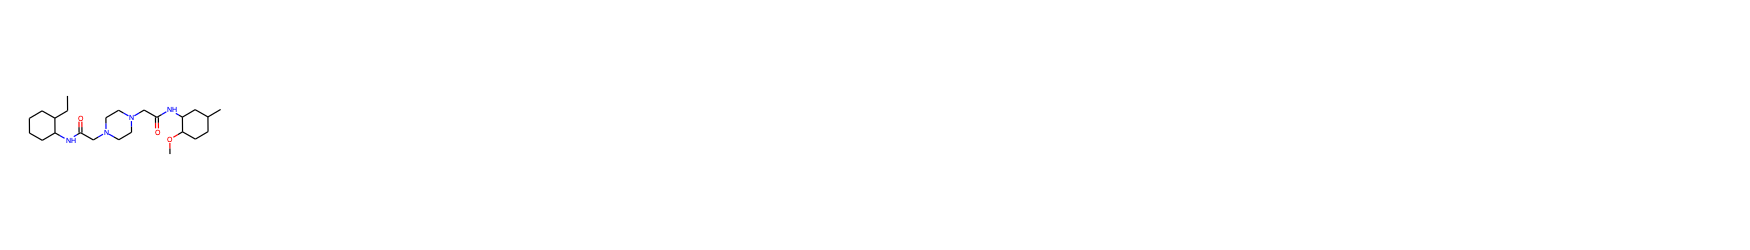

21 unique components in 31 fragments


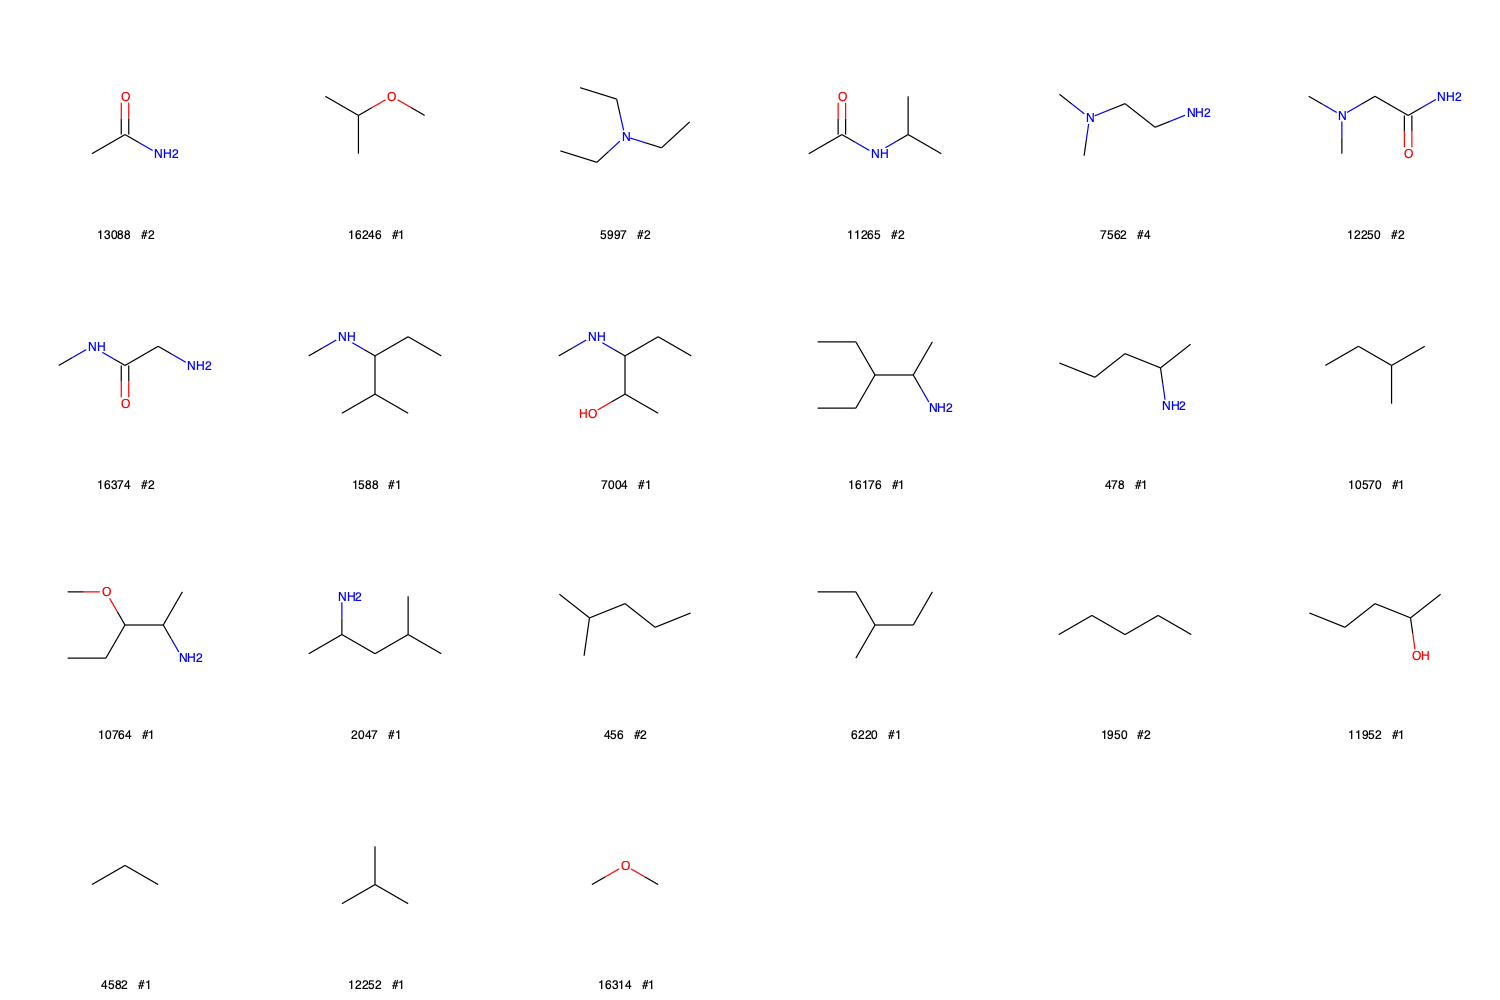

________________________________________________________________________________


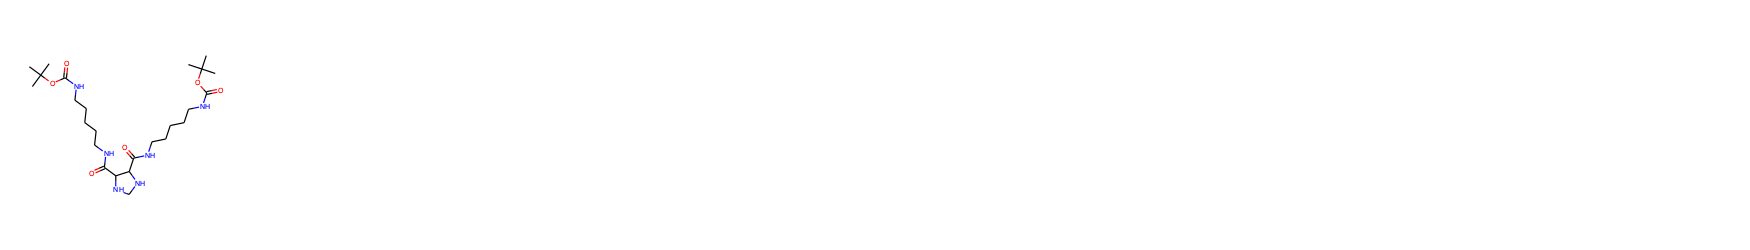

15 unique components in 37 fragments


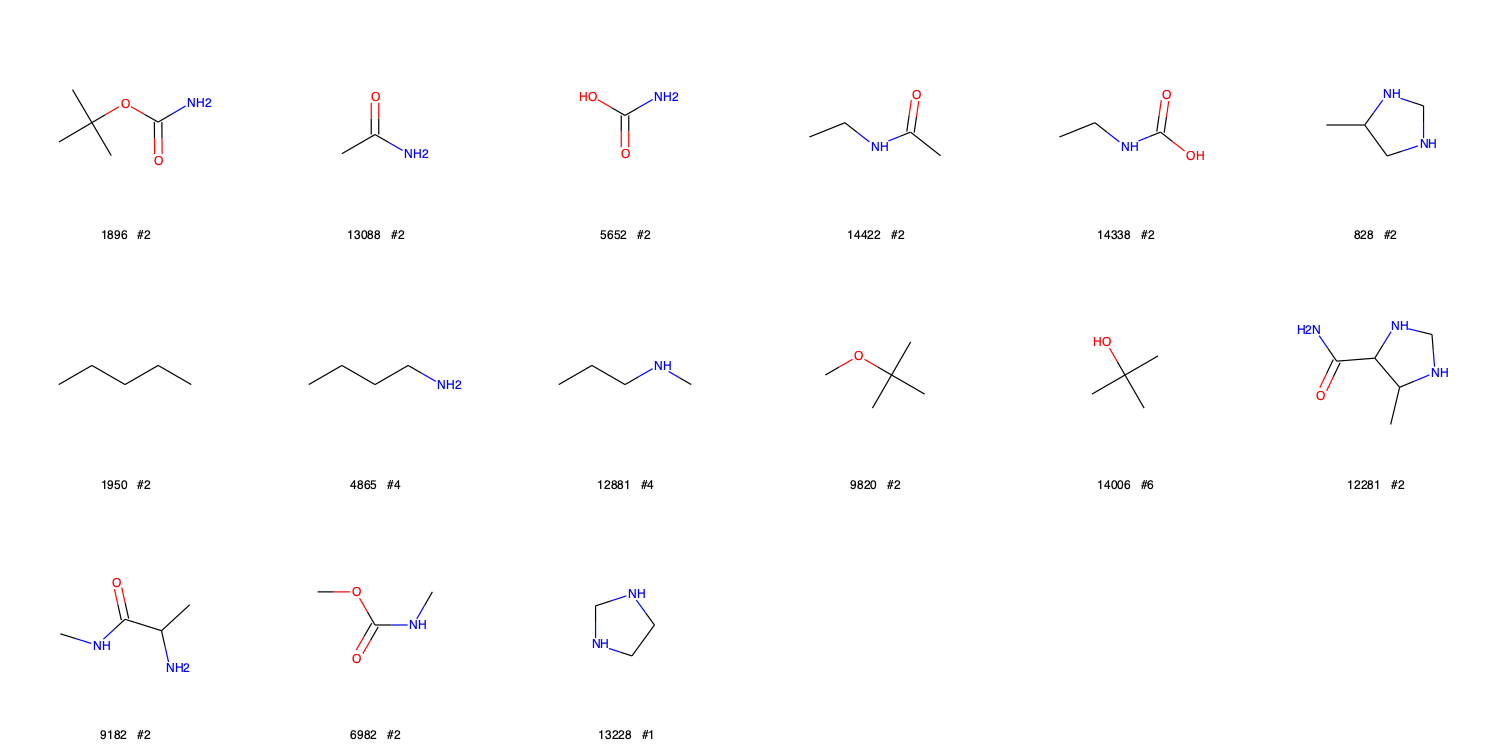

In [33]:
df = decompose_neighborhood(radius=2)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


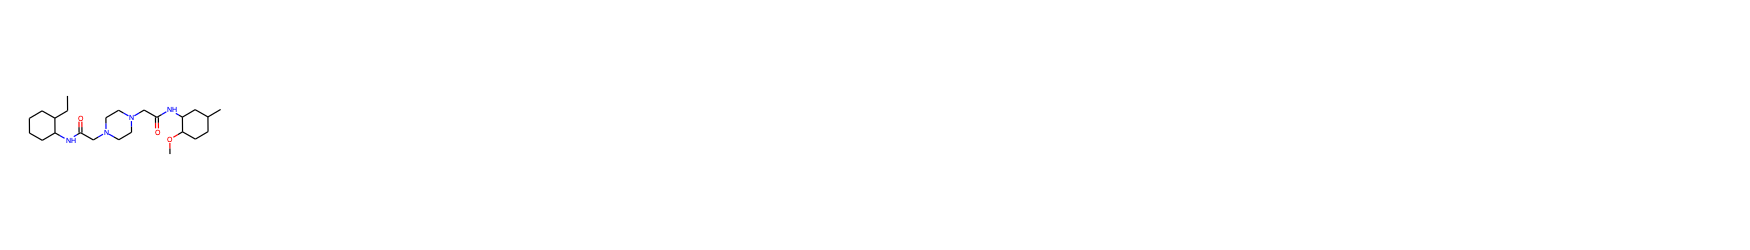

6 unique components in 8 fragments


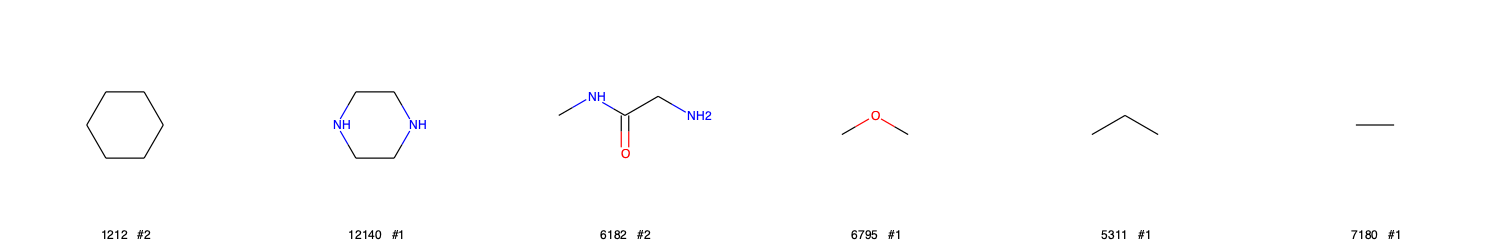

________________________________________________________________________________


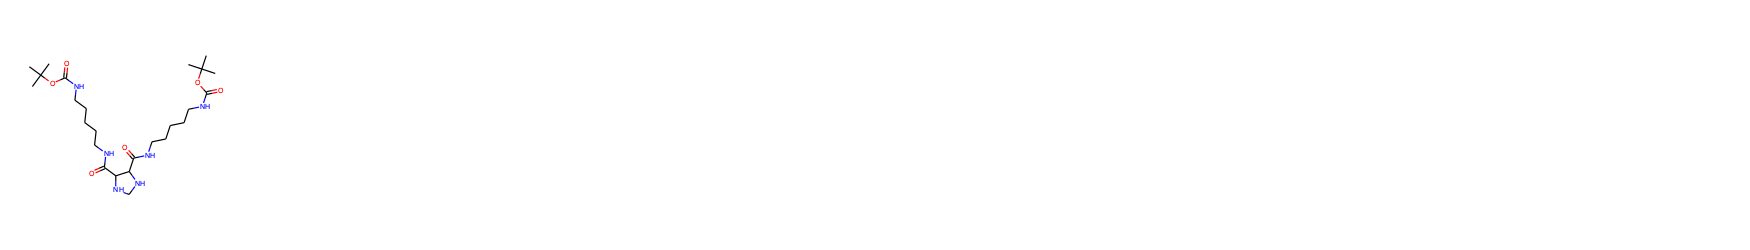

2 unique components in 3 fragments


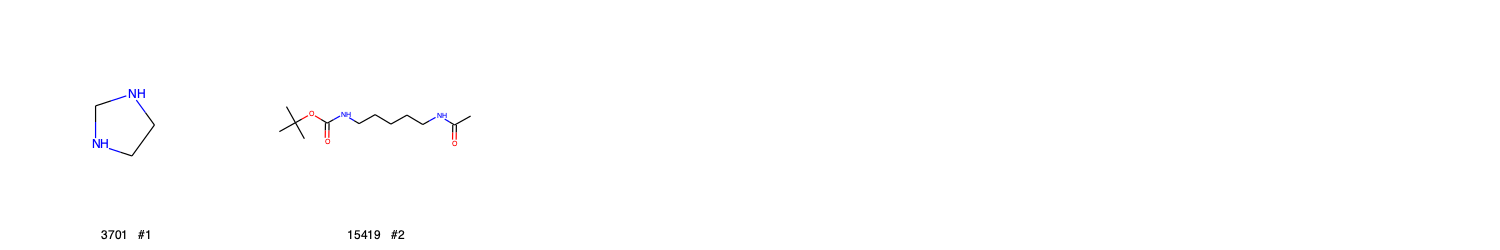

In [28]:
df = decompose_cycles_and_non_cycles
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


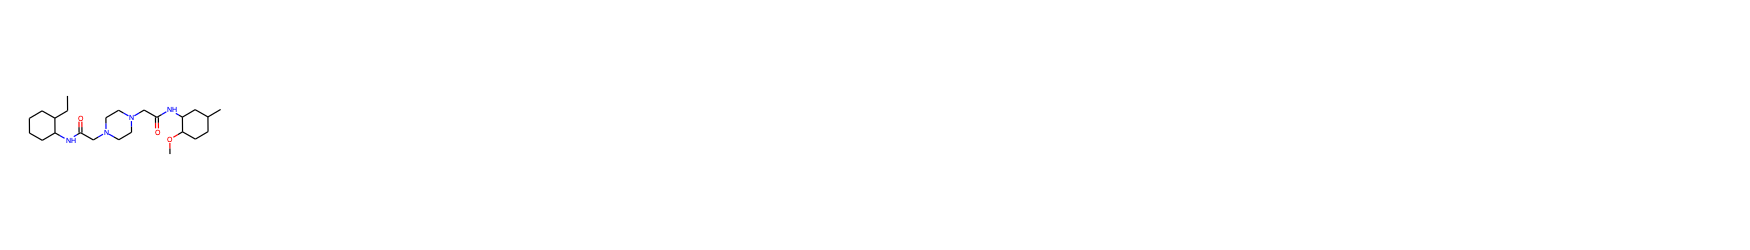

14 unique components in 34 fragments


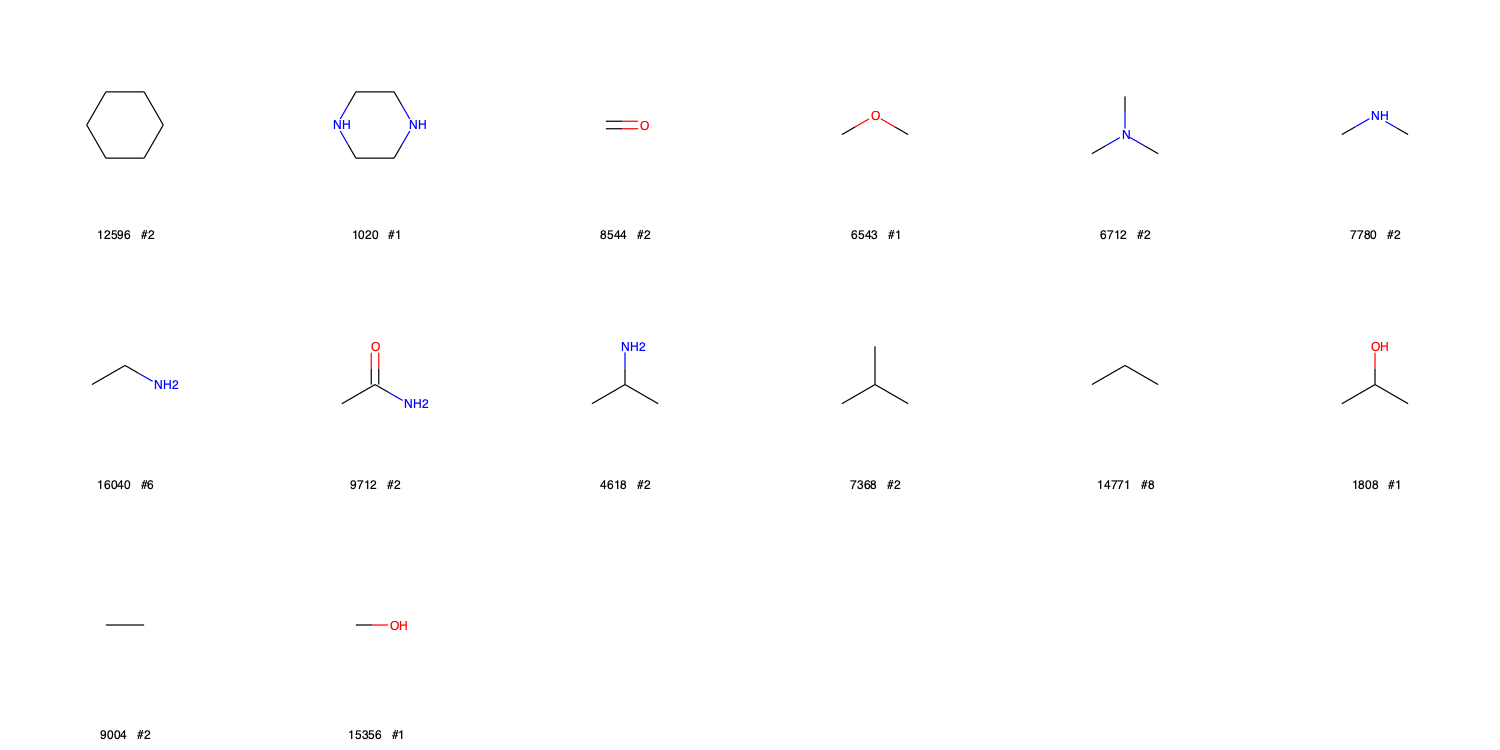

________________________________________________________________________________


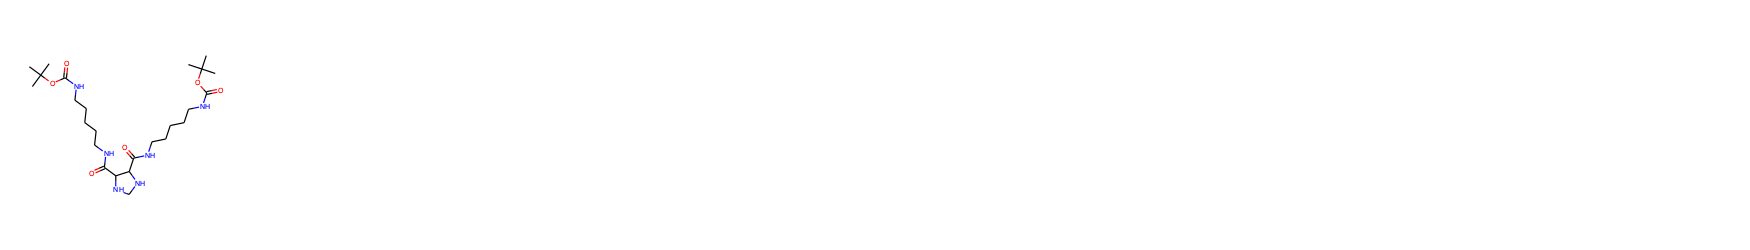

12 unique components in 38 fragments


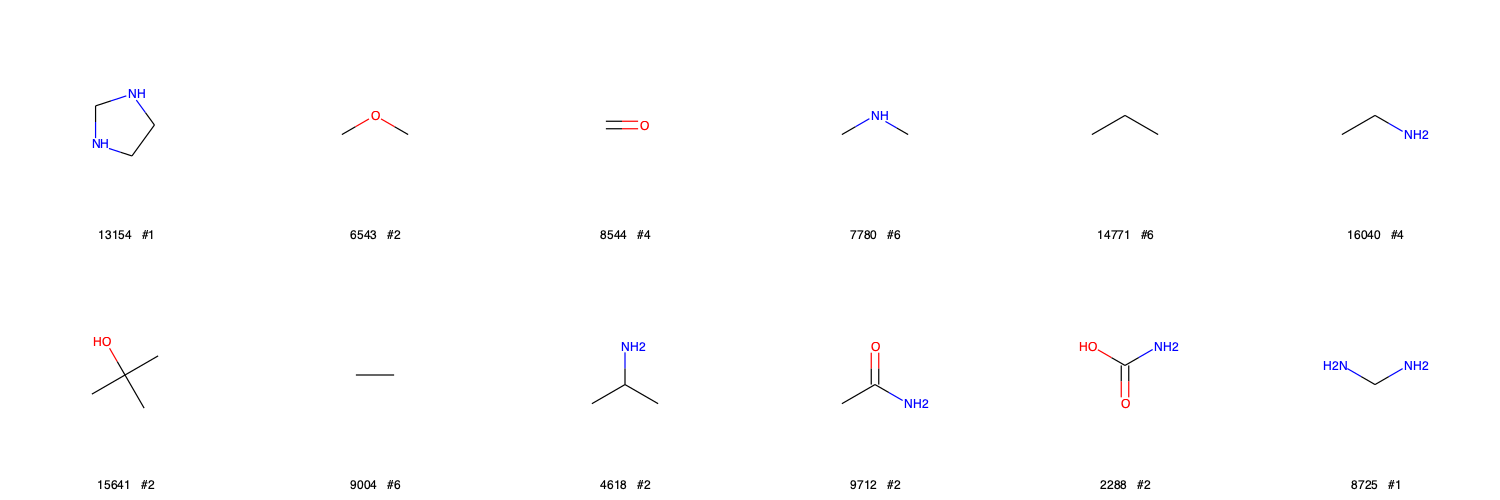

In [29]:
df = do_decompose(decompose_cycles, decompose_neighborhood, aggregate_function=decompose_concatenate, compose_function=decompose_identity)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


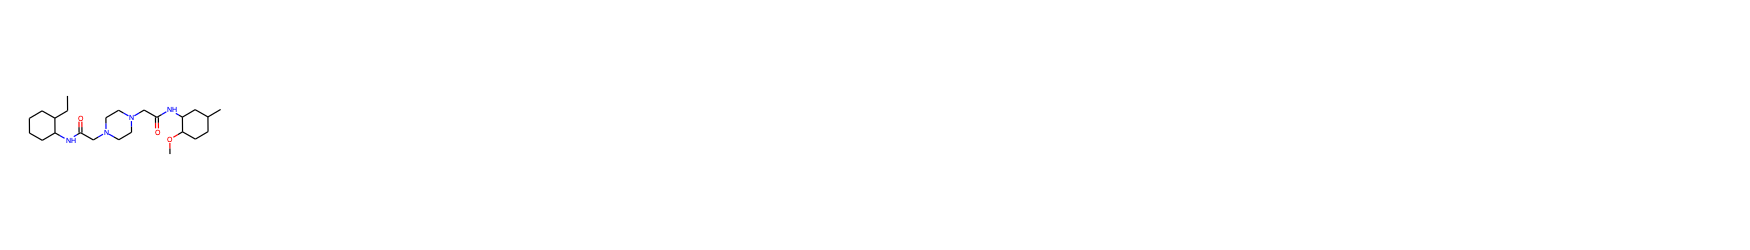

16 unique components in 33 fragments


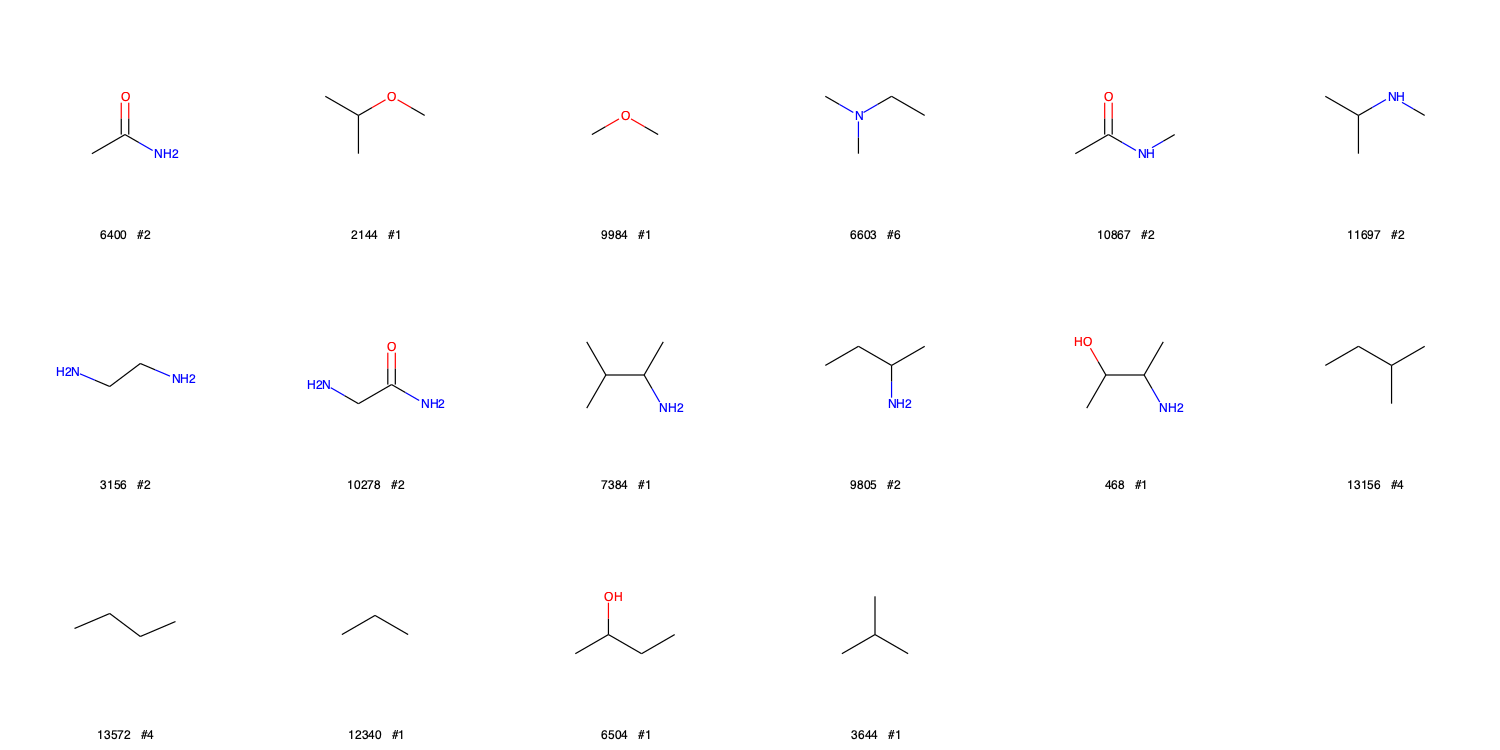

________________________________________________________________________________


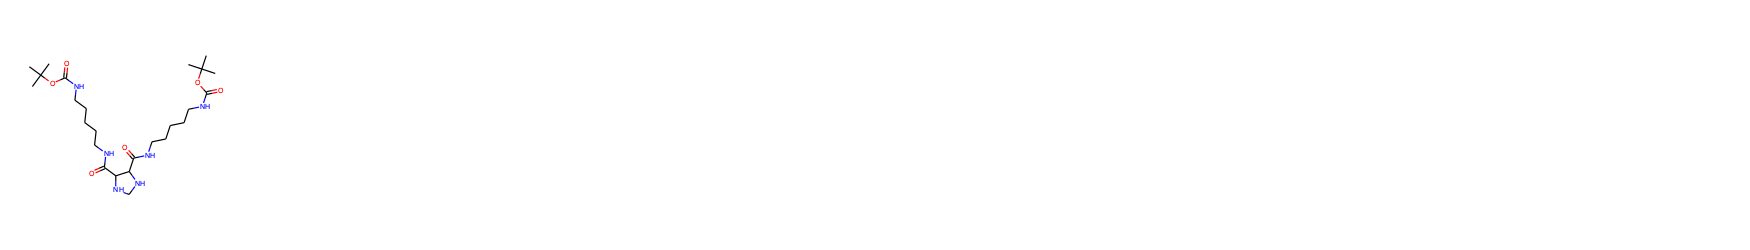

14 unique components in 37 fragments


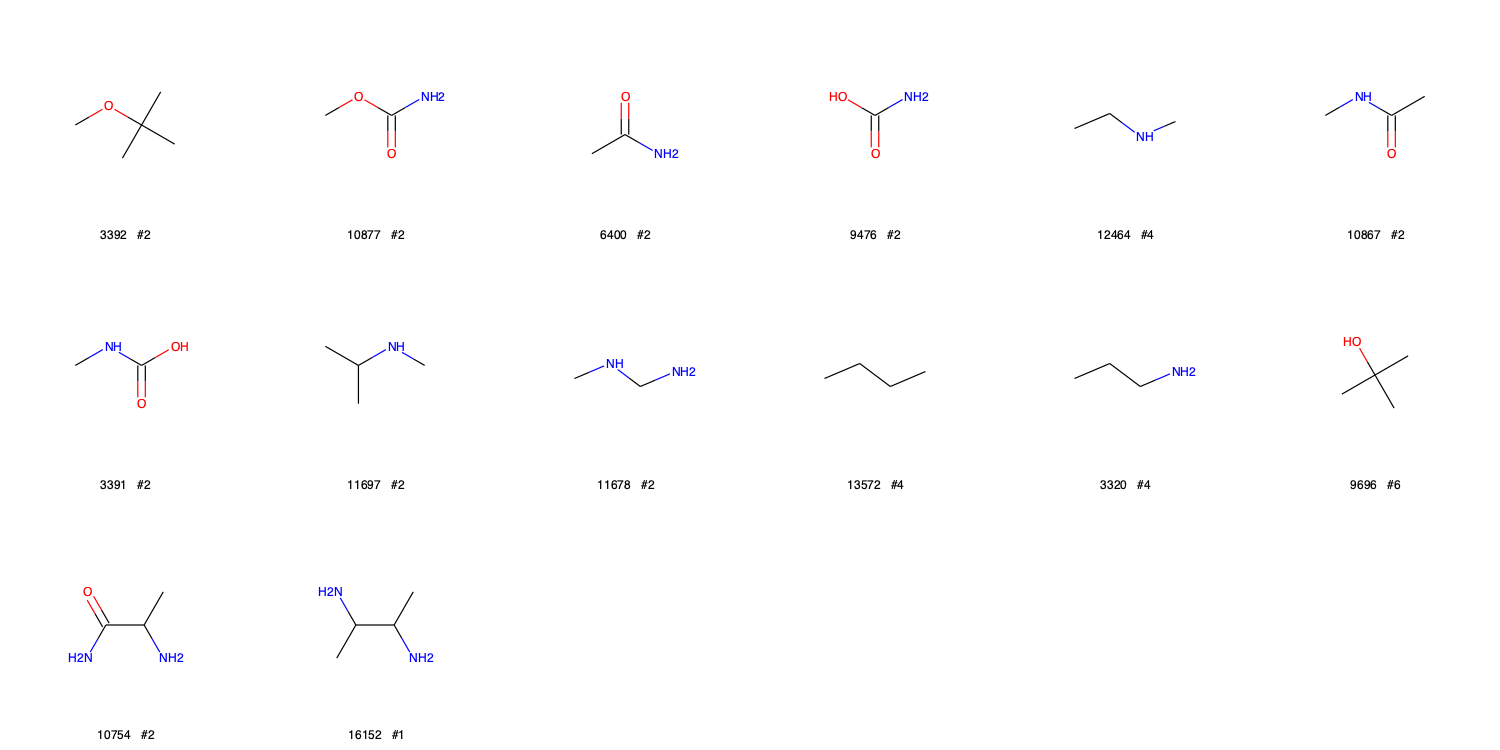

In [31]:
df = do_decompose(decompose_cycles, decompose_neighborhood, aggregate_function=decompose_concatenate, compose_function=decompose_edge_join)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

________________________________________________________________________________


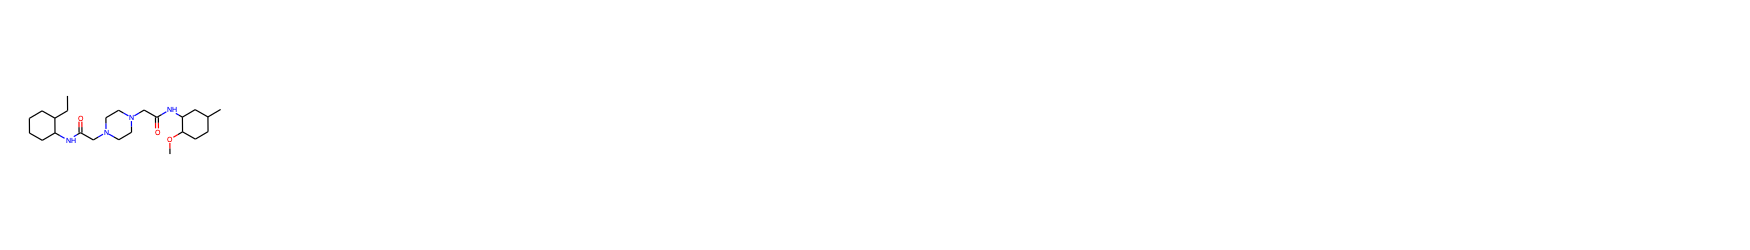

8 unique components in 8 fragments


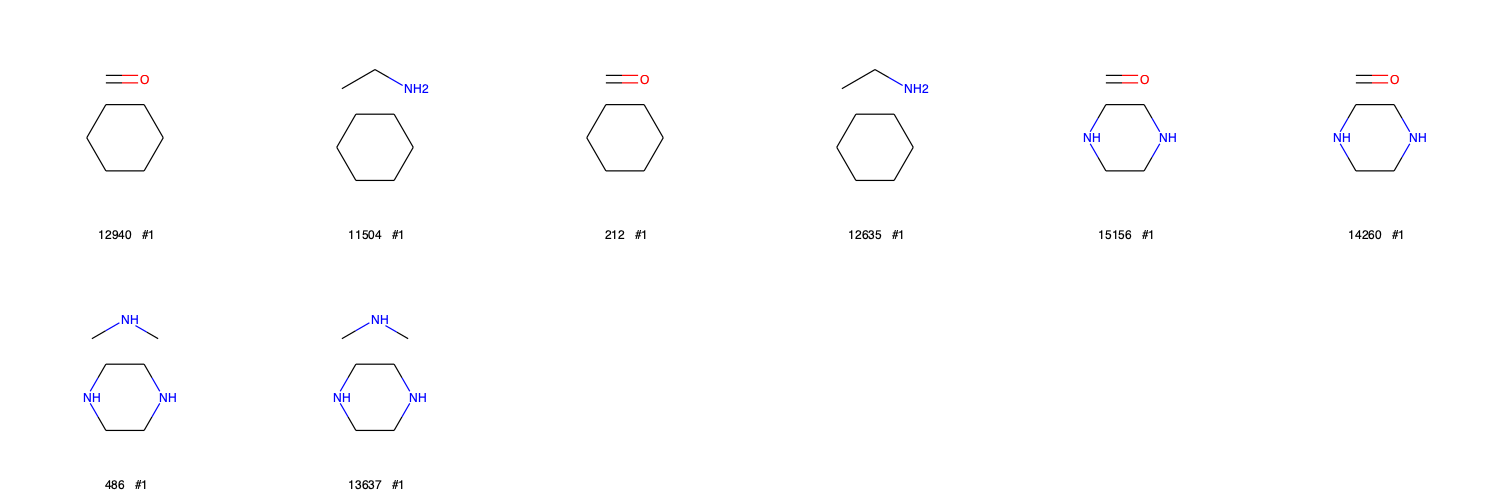

________________________________________________________________________________


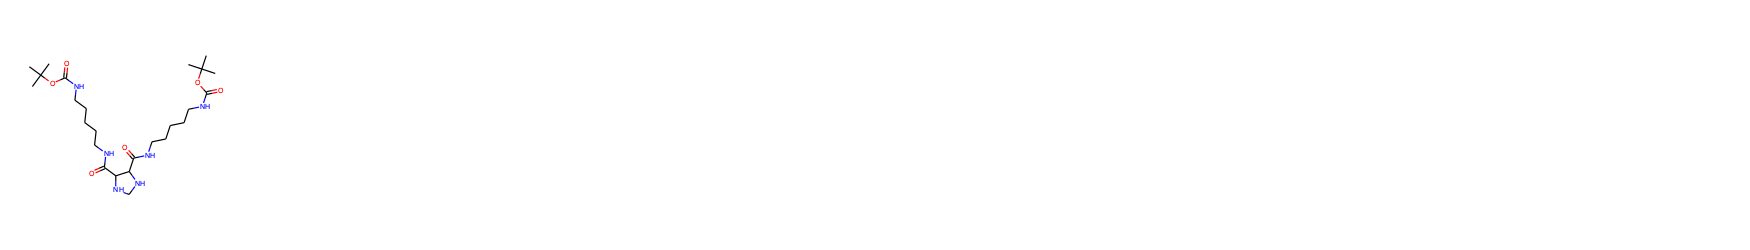

2 unique components in 2 fragments


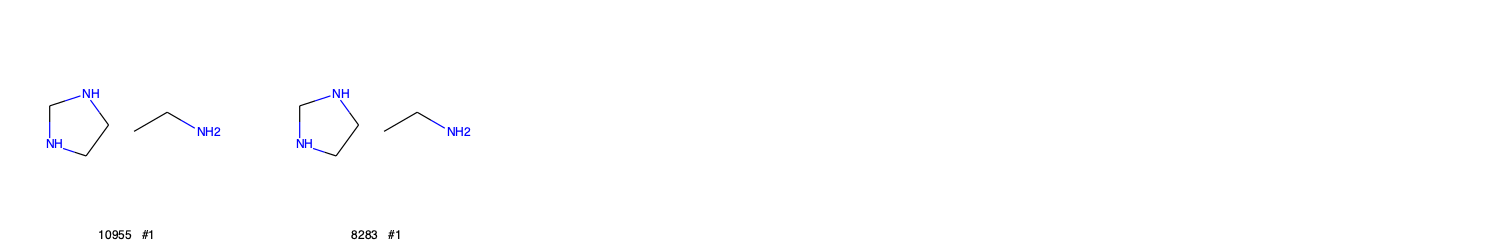

In [32]:
df = do_decompose(decompose_cycles, decompose_neighborhood, aggregate_function=decompose_pair_binary(distance=2), compose_function=decompose_identity)
draw_decomposition_graphs(graphs, df, draw_graphs=draw_graphs)

---